In [1]:
import pandas as pd

In [2]:
pp = pd.read_csv('peak_time_system.txt', delimiter='\t')
pp[(pp['data']=='peak') & (pp['direction']=='import') ].head(20)

scenario   obj direction  data   Large  Medium  Small  Warehouse
0       Grid  COST    import  peak  1417.0   274.0   15.5       78.1
2   Grid-200  COST    import  peak  1354.6   273.8   14.4       78.1
6   Grid-200   net    import  peak  1358.3   273.8   14.4       78.1
10  Grid-106  COST    import  peak  1355.3   273.8   14.4       78.1
14  Grid-106   net    import  peak  1352.9   273.8   14.4       78.1

In [3]:
pp[(pp['data']=='time') & (pp['direction']=='import') ].head(20)

scenario   obj direction  data  Large  Medium  Small  Warehouse
1       Grid  COST    import  time   15.0     6.0   15.0       16.0
3   Grid-200  COST    import  time   15.0     6.0   16.0       16.0
7   Grid-200   net    import  time   15.0     6.0   16.0       16.0
11  Grid-106  COST    import  time   15.0     6.0   16.0       16.0
15  Grid-106   net    import  time   15.0     6.0   16.0       16.0

In [4]:
pp[(pp['data']=='peak') & (pp['direction']=='export') ].head(20)

scenario   obj direction  data  Large  Medium  Small  Warehouse
4   Grid-200  COST    export  peak   96.3     0.0   38.8       97.4
8   Grid-200   net    export  peak   97.3     0.0   44.4       95.2
12  Grid-106  COST    export  peak   91.7   101.0   46.3       97.4
16  Grid-106   net    export  peak   95.7    99.4   44.4       96.3

In [5]:
pp[(pp['data']=='time') & (pp['direction']=='export') ].head(20)

scenario   obj direction  data  Large  Medium  Small  Warehouse
5   Grid-200  COST    export  time   12.0     0.0   12.0       12.0
9   Grid-200   net    export  time   12.0     0.0   12.0       12.0
13  Grid-106  COST    export  time   12.0    12.0   12.0       12.0
17  Grid-106   net    export  time   13.0    13.0   12.0       12.0

In [6]:
import numpy as np
length_ = len(pp[pp['scenario']=='Grid-200']['scenario'])
str_array=np.repeat('PV-200', length_)
str_array

array(['PV-200', 'PV-200', 'PV-200', 'PV-200', 'PV-200', 'PV-200',
       'PV-200', 'PV-200'], dtype='<U6')

In [7]:
pp.loc[pp[pp['scenario']=='Grid-200'].index,'scenario'] = 'PV-200'
pp.loc[pp[pp['scenario']=='Grid-106'].index,'scenario'] = 'PV-106'
pp.loc[pp[pp['obj']=='net'].index,'obj'] = 'GI'

In [8]:
pp[(pp['data']=='time') & (pp['direction']=='export') ].head(20)

scenario   obj direction  data  Large  Medium  Small  Warehouse
5    PV-200  COST    export  time   12.0     0.0   12.0       12.0
9    PV-200    GI    export  time   12.0     0.0   12.0       12.0
13   PV-106  COST    export  time   12.0    12.0   12.0       12.0
17   PV-106    GI    export  time   13.0    13.0   12.0       12.0

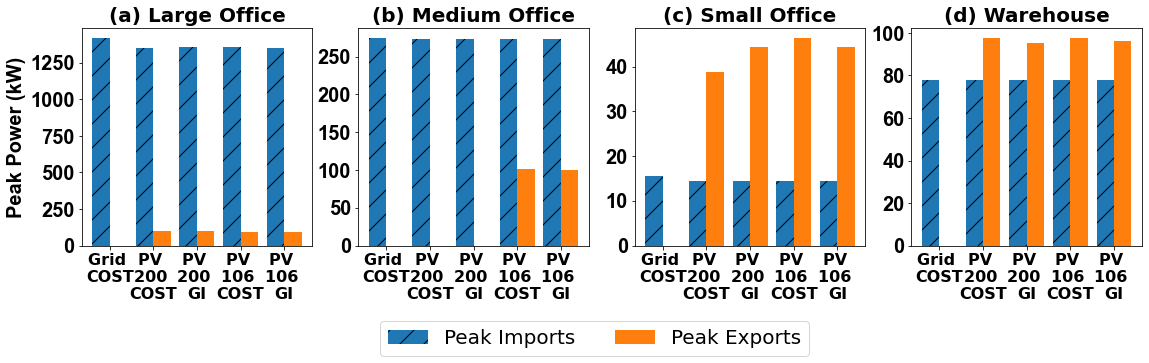

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, axs = plt.subplots(1, 4, figsize=(19, 4))
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.rc('axes', titlesize=20)  # fontsize of the figure title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('legend', fontsize=20)    # legend fontsizev
buildings = ['Large','Medium','Small','Warehouse']
w=0.4
for i in range(len(buildings)):
  pp_=pp[(pp['data']=='peak') & (pp['direction']=='import') ]
  names_ = pp_['scenario']
  objs_ =  pp_['obj'].reset_index()
  lab_ = []
  for j, name_ in enumerate(names_):
    name_ = name_.split('-')
    try:
      lab_.append(str(name_[0] + ' \n' + name_[1] + ' \n' + objs_.loc[j,'obj']))
    except:
      lab_.append(str(name_[0] + ' \n' + objs_.loc[j,'obj']))
  #  labels  = pp_['scenario'] + ' \n ' + pp_['obj']
  ind = np.array([0,1,2,3,4])
  import_names  = ind-w/2
  import_values = pp_[buildings[i]]
  pp__=pp[(pp['data']=='peak') & (pp['direction']=='export') ]
  export_names  = np.array([1,2,3,4])+w/2
  export_values = pp__[buildings[i]]
  # imports
  impo=axs[i].bar(import_names, import_values,width=w,hatch="/")
  # exports
  expo=axs[i].bar(export_names, export_values,width=w)
  # labels
  #print(lab_)
  axs[i].set_xticks(ind)
  axs[i].set_xticklabels(lab_, fontdict={"fontweight":"bold",'horizontalalignment':'center'})
  buildings_names = ['(a) Large Office','(b) Medium Office','(c) Small Office','(d) Warehouse']

  axs[i].set_title('{}'.format(buildings_names[i]),fontweight="bold")
  for tick in axs[i].get_yticklabels():
        tick.set_fontname("Arial")
        tick.set_fontweight("bold")
        tick.set_fontsize(20)

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 20}    

axs[0].set_ylabel('Peak Power (kW)',fontsize=20,fontdict=font)
axs[1].legend( (impo[0],expo[0]), ('Peak Imports', 'Peak Exports'), bbox_to_anchor=(2, -0.3), shadow=False, ncol=2)
plt.savefig('../paper_images/peak_power.pdf', bbox_inches='tight')
plt.show()
